In [60]:
# Setup enviroment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [62]:
# Get the dataset
from sklearn.datasets import load_boston
boston = load_boston()
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [64]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [65]:
# Make a dataframe
pd.DataFrame(boston.data)
df = pd.DataFrame(boston['data'],columns=boston.feature_names)
df['MEDV'] = boston['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [67]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


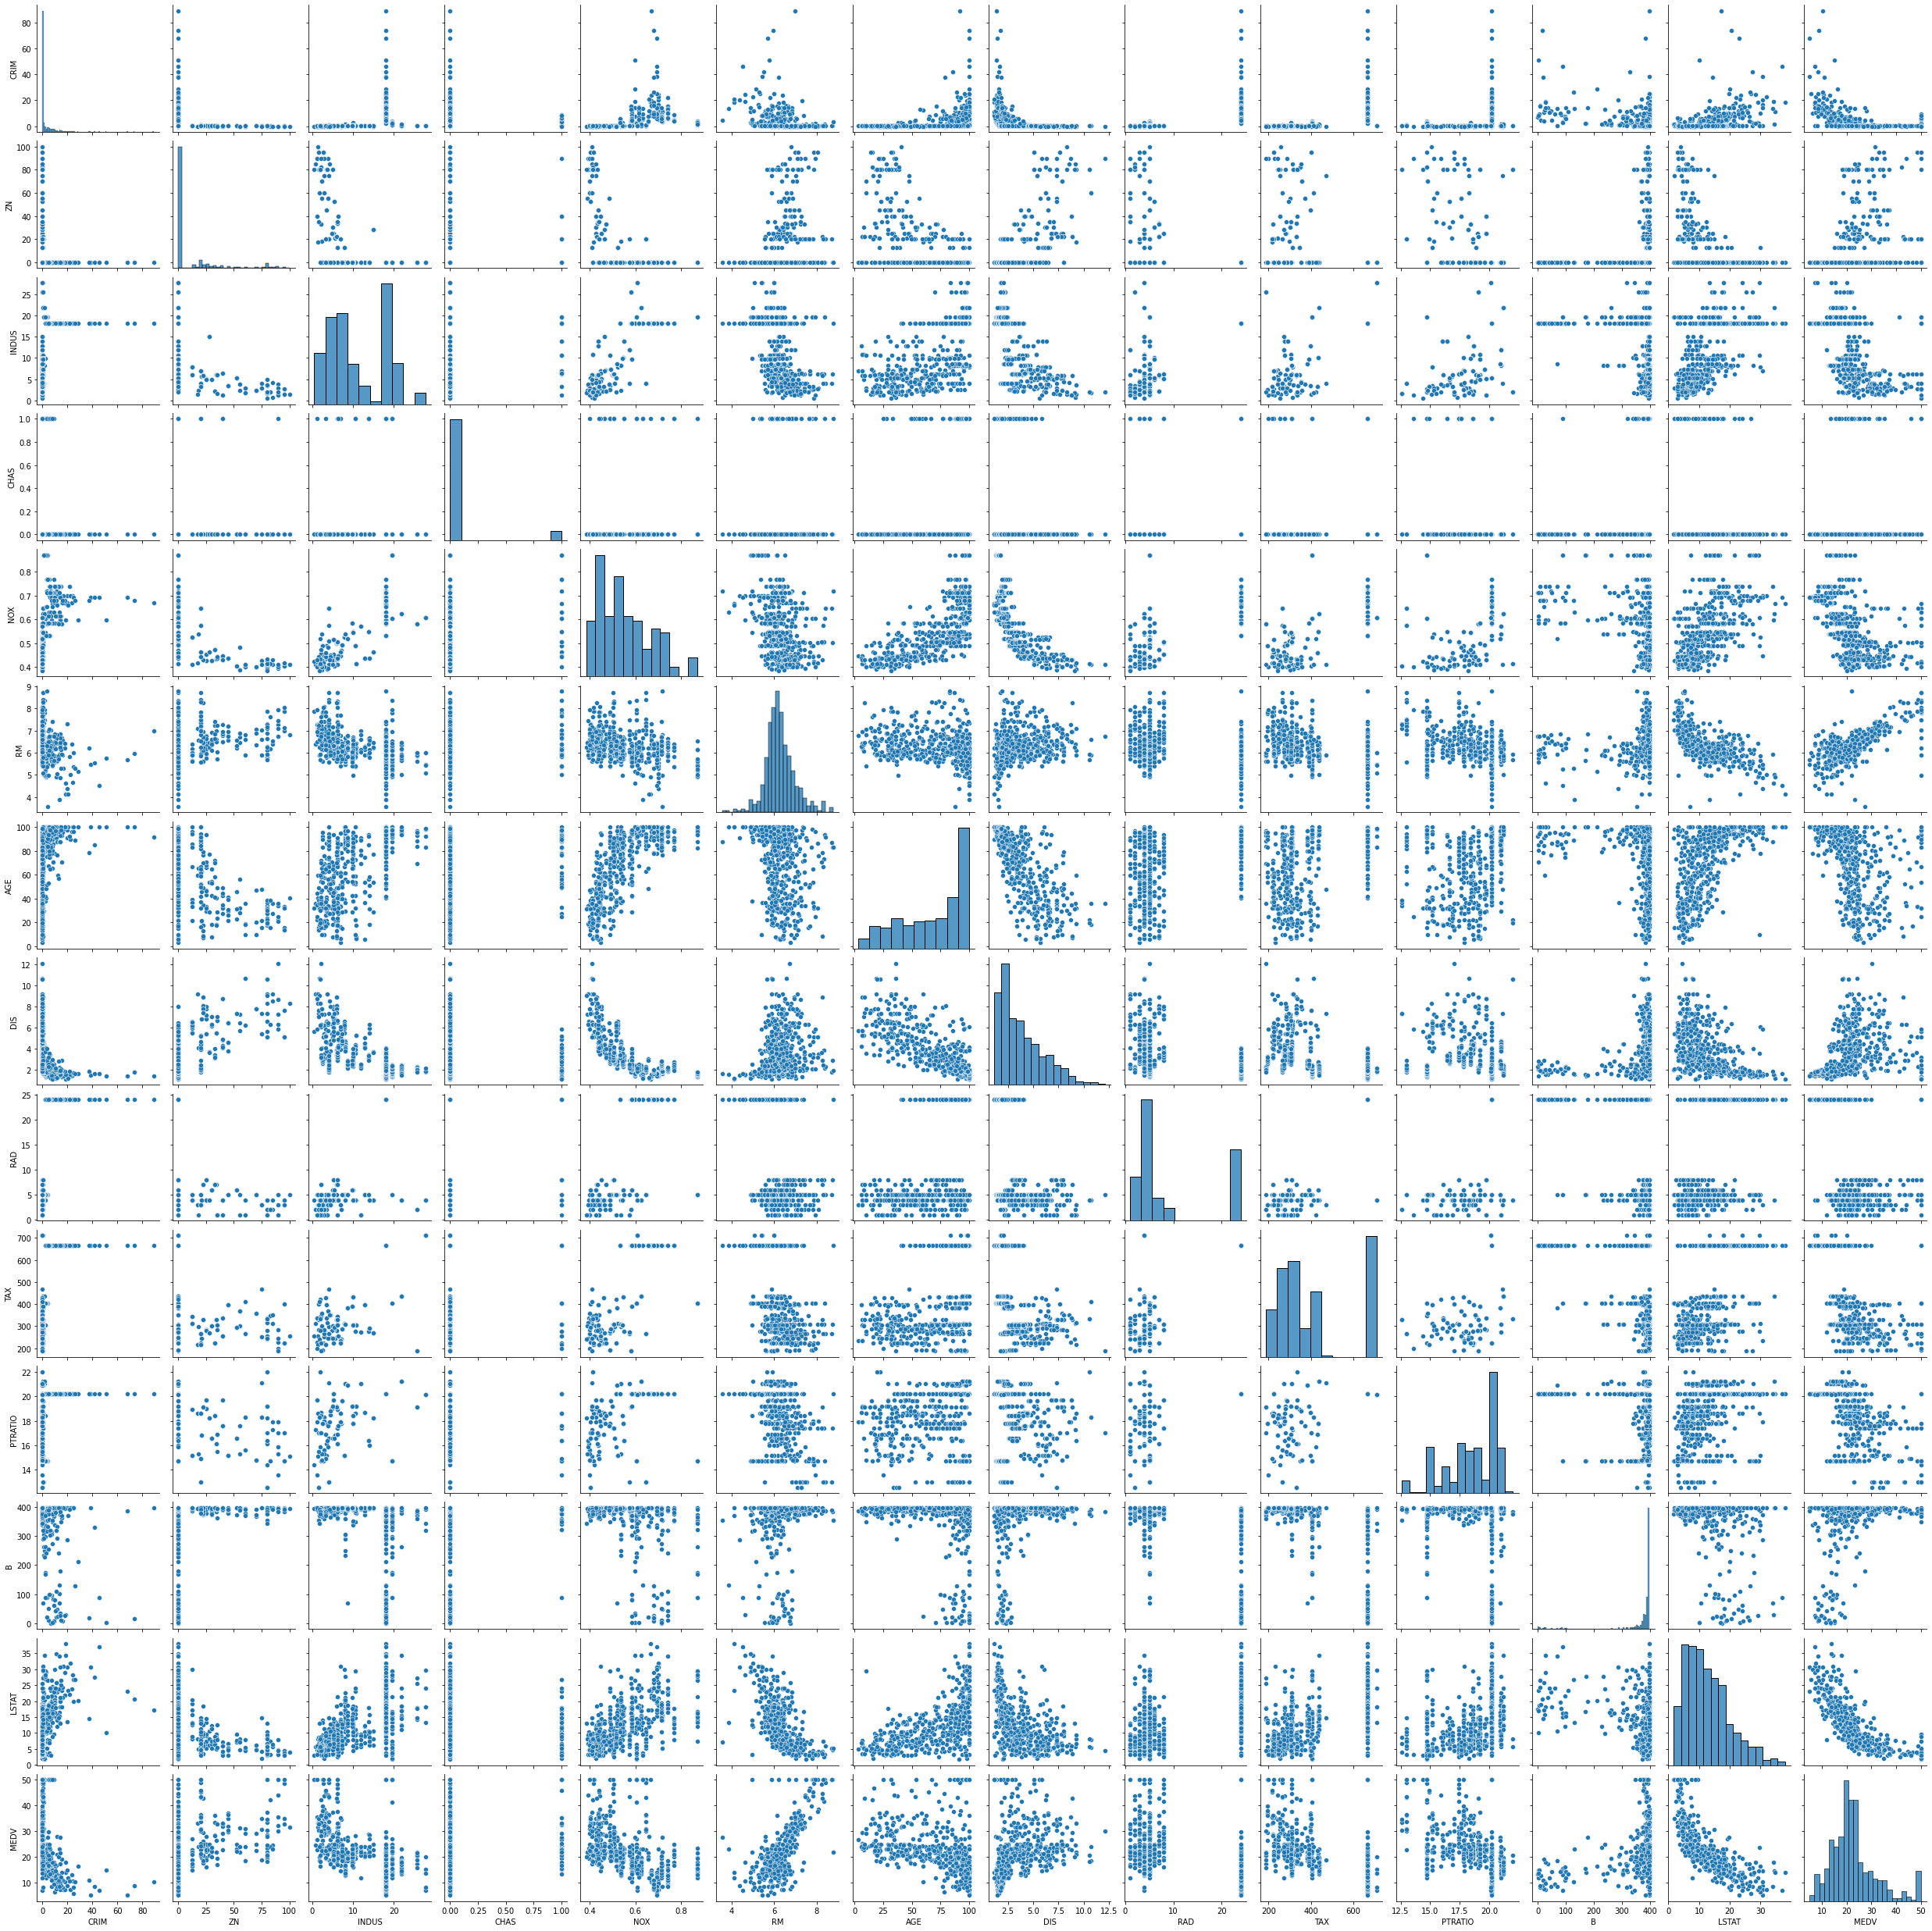

In [68]:
sns.pairplot(df)

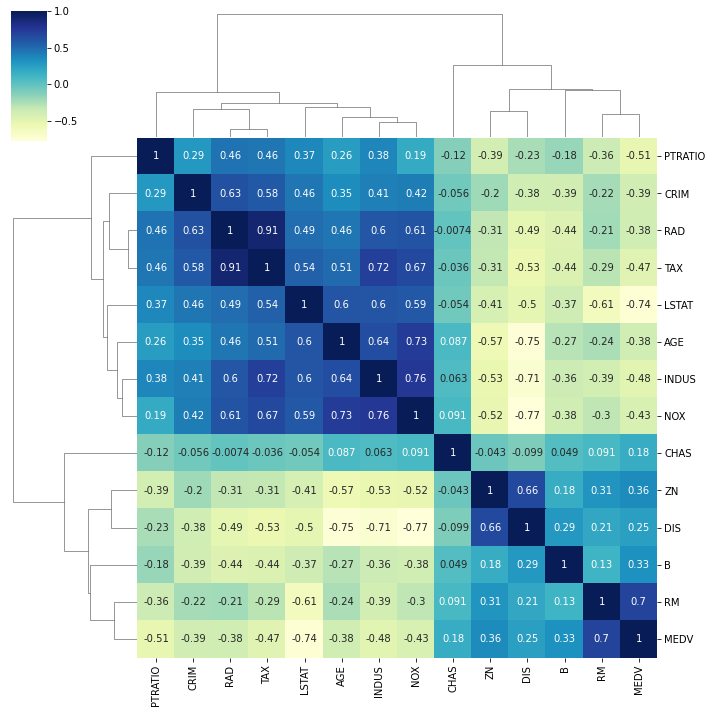

In [79]:
sns.clustermap(df.corr(),cmap='YlGnBu',annot=True)

So, from correlation of attributes, we learn that our most closely associated attributes in our dataset is **RM, PTRATIO, LSTAT, MEDV**

In [132]:
df1=df[df['MEDV']!=50]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     490 non-null    float64
 1   ZN       490 non-null    float64
 2   INDUS    490 non-null    float64
 3   CHAS     490 non-null    float64
 4   NOX      490 non-null    float64
 5   RM       490 non-null    float64
 6   AGE      490 non-null    float64
 7   DIS      490 non-null    float64
 8   RAD      490 non-null    float64
 9   TAX      490 non-null    float64
 10  PTRATIO  490 non-null    float64
 11  B        490 non-null    float64
 12  LSTAT    490 non-null    float64
 13  MEDV     490 non-null    float64
dtypes: float64(14)
memory usage: 57.4 KB


In [137]:
# Outlier RM = 8.78
print(df1[df1['RM']==8.78])
df1=df1[df1['RM']!=8.78]

        CRIM   ZN  INDUS  CHAS    NOX    RM   AGE     DIS   RAD    TAX  \
364  3.47428  0.0   18.1   1.0  0.718  8.78  82.9  1.9047  24.0  666.0   

     PTRATIO       B  LSTAT  MEDV  
364     20.2  354.55   5.29  21.9  


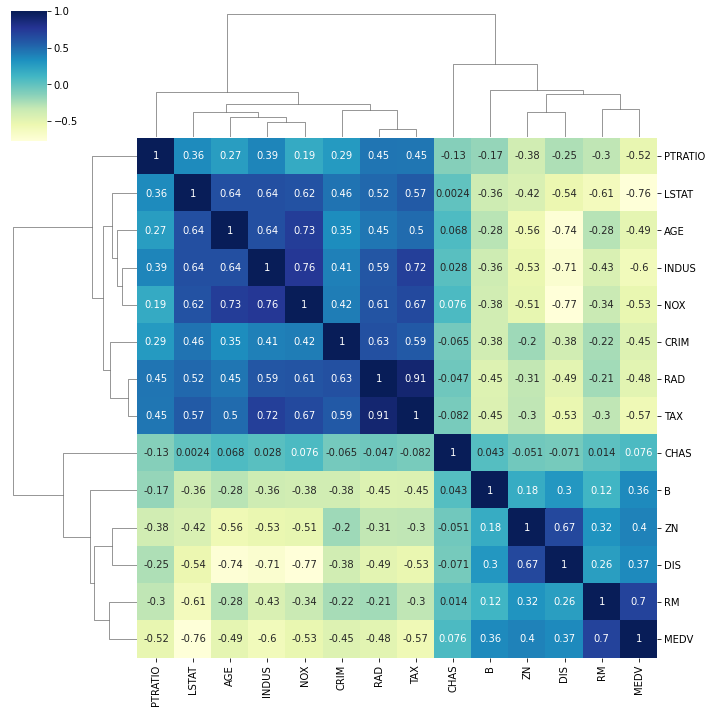

In [138]:
sns.clustermap(df1.corr(),cmap='YlGnBu',annot=True)

In [154]:
X = df1[['RM','PTRATIO','LSTAT','TAX','NOX','INDUS']]
y = df1['MEDV']

In [155]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [156]:
lm = LinearRegression()

In [157]:
lm.fit(X_train,y_train)

LinearRegression()

In [158]:
y_pred = lm.predict(X_test)

In [159]:
print('MAE =',metrics.mean_absolute_error(y_test,y_pred))
print('MSE =',metrics.mean_squared_error(y_test,y_pred))
print('RMSE =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE = 3.110597593354278
MSE = 18.319790750174004
RMSE = 4.2801624677311025


In [160]:
metrics.explained_variance_score(y_test,y_pred)

0.7466987671053589

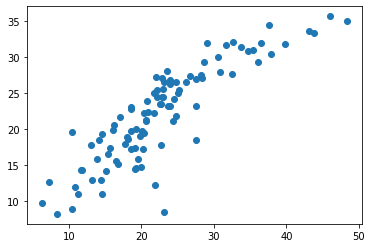

In [161]:
plt.scatter(y_test,y_pred)

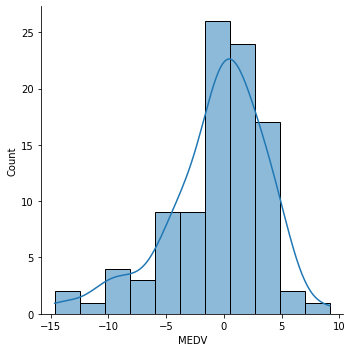

In [164]:
sns.displot((y_pred-y_test),kde=True)

In [165]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficients'])
coeff_df

,Coefficients
RM,4.148490
PTRATIO,-0.813598
LSTAT,-0.397141
TAX,-0.005453
NOX,-5.769148
INDUS,0.026487


C:\Users\Ayush\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


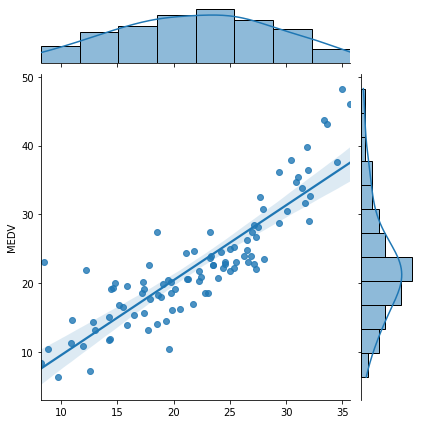

In [169]:
sns.jointplot(y_pred,y_test,kind='reg')